### Prepared By:

- Christina Montasser 20190382 S3
- Esraa Yazid 20190093 S1
- Mariam Ihab 20190801 S1
- Mirette Amin 20190570 S3
- Nader Atef 20190575 S3

``Group Number: 28``


In [ ]:
%pip install opendatasets

In [14]:
# import opendatasets as od
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [11]:
# od.download("https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset")
# df= pd.read_csv("./smoke_detection_iot.csv")

In [10]:
class PCA:
    def __init__(self, n):
        self.num_comopnents = n
        self.__covMat = 0
        self.__eigenVec = 0
        self.__eigenVals = 0
        self.mean = 0

    def fit(self, data):
        # rowvar makes meanedData transposed
        self.mean = np.mean(data, axis=0)
        meanedData = data - self.mean
        self.__covMat = np.cov(meanedData, rowvar=False)
        self.__eigenVals, self.__eigenVec = np.linalg.eigh(self.__covMat)

        # Sort Eigen Vectors and Eigen Values
        idx_sorted = np.argsort(self.__eigenVals)[::-1]
        self.__eigenVals = self.__eigenVals[idx_sorted]
        self.__eigenVec = self.__eigenVec[:, idx_sorted]

    def getCovarianceMat(self):
        return self.__covMat

    def getEigenVectors(self):
        return self.getEigenVectors

    def getEigenVals(self):
        return self.getEigenVals

    def transform(self, data):
        subset = self.__eigenVec[:, 0 : self.num_comopnents]
        meanedData = data - self.mean
        reduced = np.dot(subset.transpose(), meanedData.transpose()).transpose()
        return reduced

    def fit_transform(self, data):
        self.fit(data)
        res = self.transform(data)
        return res

In [12]:
df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [18]:
df = pd.read_csv("smoke_detection_iot.csv")
df.drop(["Unnamed: 0", "UTC" , "CNT"], axis=1, inplace=True)
y = df.pop("Fire Alarm").to_numpy()
X = df
scaler = StandardScaler()
# Splitting Data
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.3, shuffle=True)
x_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)


In [19]:
#using 2 components only for visualization
pca = PCA(2)
train = pca.fit_transform(x_scaled)
test = pca.transform(x_test_scaled)


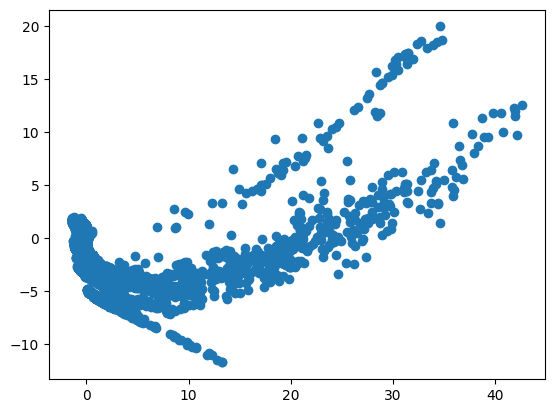

In [20]:
import matplotlib.pyplot as plt

plt.scatter(train[:,0], train[:,1])
plt.show()

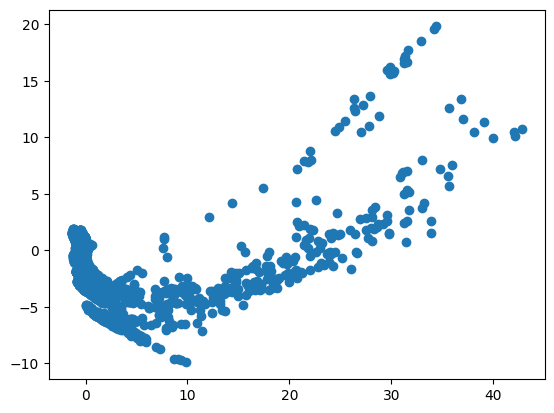

In [21]:
import matplotlib.pyplot as plt

plt.scatter(test[:,0], test[:,1])
plt.show()